313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.8715 - loss: 0.3737
Precisión en el conjunto de prueba: 0.8741
Pérdida en el conjunto de prueba: 0.3848
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step

Reporte de clasificación:

              precision    recall  f1-score   support

    Negative       0.87      0.88      0.87      4961
    Positive       0.88      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



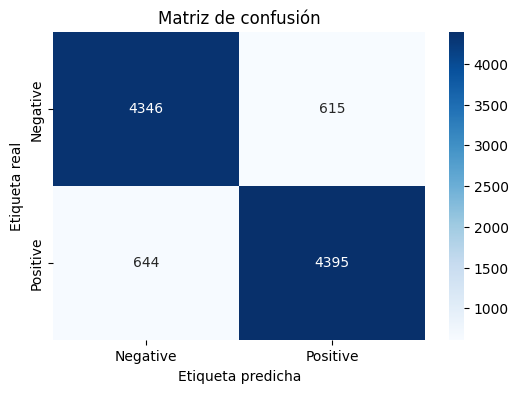

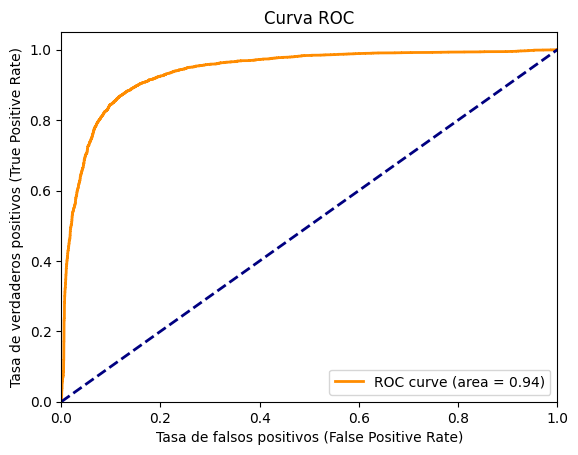

In [2]:
# evaluate_model.py

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el modelo entrenado y los datos de prueba
model = load_model('lstm_sentiment_model.h5')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

# 2. Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")

# 3. Predicciones del modelo
threshold = 0.5  # Cambiar el umbral de decisión
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > threshold).astype(int)

# 4. Generar el reporte de clasificación
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# 5. Matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Matriz de confusión')
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# 6. Curva ROC y AUC
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de falsos positivos (False Positive Rate)')
    plt.ylabel('Tasa de verdaderos positivos (True Positive Rate)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(y_test, y_pred_prob)

